In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random


In [3]:
gt_w96 = r'results\weather_ACLR_96_96_iTransformer_custom_M_ft96_sl48_ll96_pl512_dm8_nh3_el1_dl512_df1_fctimeF_ebTrue_dtExp_projection_0\true.npy'
gt_w96.replace('\\', '/')
pred_w96 = r'results\weather_96_96_iTransformer_custom_M_ft96_sl48_ll96_pl512_dm8_nh3_el1_dl512_df1_fctimeF_ebTrue_dtExp_projection_0\pred.npy'
pred_w96.replace('\\', '/')
pred_w96_aclr = r'results\weather_ACLR_96_96_iTransformer_custom_M_ft96_sl48_ll96_pl512_dm8_nh3_el1_dl512_df1_fctimeF_ebTrue_dtExp_projection_0\pred.npy'
pred_w96_aclr.replace('\\', '/')

gt_w192 = r'results\weather_ACLR_96_192_iTransformer_custom_M_ft96_sl48_ll192_pl512_dm8_nh3_el1_dl512_df1_fctimeF_ebTrue_dtExp_projection_0\true.npy'
gt_w192.replace('\\', '/')
pred_w192 = r'results\weather_96_192_iTransformer_custom_M_ft96_sl48_ll192_pl512_dm8_nh3_el1_dl512_df1_fctimeF_ebTrue_dtExp_projection_0\pred.npy'
pred_w192.replace('\\', '/') 
pred_w192_aclr = r'results\weather_ACLR_96_192_iTransformer_custom_M_ft96_sl48_ll192_pl512_dm8_nh3_el1_dl512_df1_fctimeF_ebTrue_dtExp_projection_0\pred.npy'
pred_w192_aclr.replace('\\', '/')

gt_w336 = r'results\weather_ACLR_96_336_iTransformer_custom_M_ft96_sl48_ll336_pl512_dm8_nh3_el1_dl512_df1_fctimeF_ebTrue_dtExp_projection_0\true.npy'
gt_w336.replace('\\', '/')
pred_w336 = r'results\weather_96_336_iTransformer_custom_M_ft96_sl48_ll336_pl512_dm8_nh3_el1_dl512_df1_fctimeF_ebTrue_dtExp_projection_0\pred.npy'
pred_w336.replace('\\', '/')
pred_w336_aclr = r'results\weather_ACLR_96_336_iTransformer_custom_M_ft96_sl48_ll336_pl512_dm8_nh3_el1_dl512_df1_fctimeF_ebTrue_dtExp_projection_0\pred.npy'
pred_w336_aclr.replace('\\', '/')

gt_w720 = r'results\weather_ACLR_96_720_iTransformer_custom_M_ft96_sl48_ll720_pl512_dm8_nh3_el1_dl512_df1_fctimeF_ebTrue_dtExp_projection_0\true.npy'
gt_w720.replace('\\', '/')
pred_w720 = r'results\weather_96_720_iTransformer_custom_M_ft96_sl48_ll720_pl512_dm8_nh3_el1_dl512_df1_fctimeF_ebTrue_dtExp_projection_0\pred.npy'
pred_w720.replace('\\', '/')
pred_w720_aclr = r'results\weather_ACLR_96_720_iTransformer_custom_M_ft96_sl48_ll720_pl512_dm8_nh3_el1_dl512_df1_fctimeF_ebTrue_dtExp_projection_0\pred.npy'
pred_w720_aclr.replace('\\', '/')

'results/weather_ACLR_96_720_iTransformer_custom_M_ft96_sl48_ll720_pl512_dm8_nh3_el1_dl512_df1_fctimeF_ebTrue_dtExp_projection_0/pred.npy'

In [4]:
# ITrans_pred = np.load('pred_iTR.npy')
# FRNet_pred = np.load('pred_FR.npy')
# infor_pred = np.load('pred_Infor.npy')
# Ptst_pred = np.load('pred_Ptst.npy')
gt96 = np.load(gt_w96)
pred96 = np.load(pred_w96)
pred_aclr96 = np.load(pred_w96_aclr)
gt192 = np.load(gt_w192)
pred192 = np.load(pred_w192)
pred_aclr192 = np.load(pred_w192_aclr)
gt336 = np.load(gt_w336)
pred336 = np.load(pred_w336)
pred_aclr336 = np.load(pred_w336_aclr)
gt720 = np.load(gt_w720)
pred720 = np.load(pred_w720)
pred_aclr720 = np.load(pred_w720_aclr)

In [5]:
print(gt96.shape)
print(gt192.shape)
print(gt336.shape)
print(gt720.shape)

(10444, 96, 21)
(10348, 192, 21)
(10204, 336, 21)
(9820, 720, 21)


74


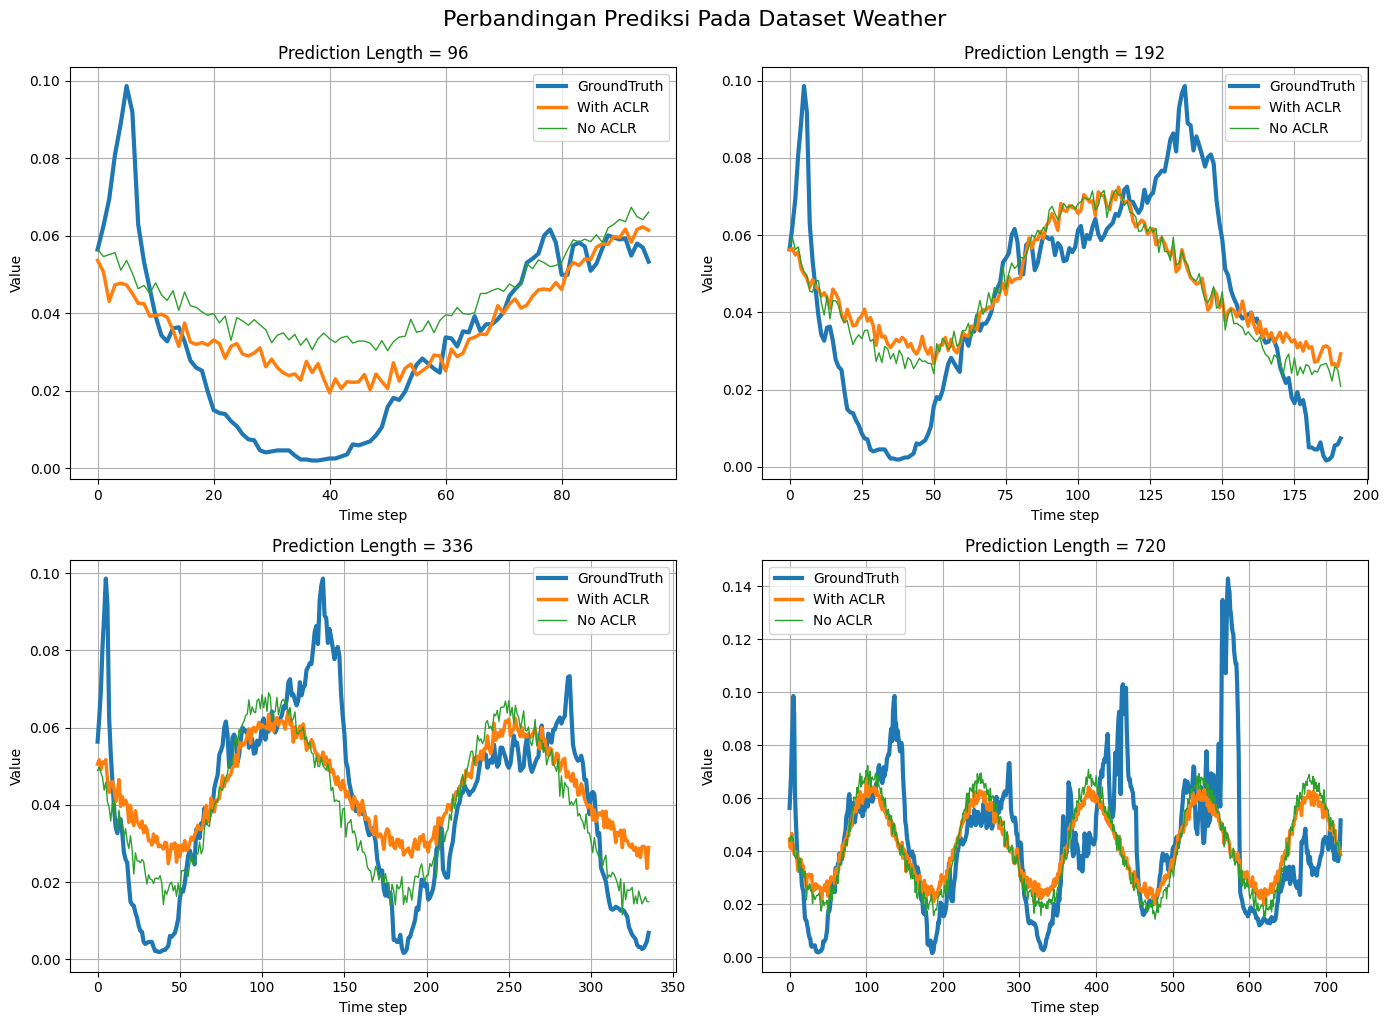

In [6]:

# List semua data prediksi dan ground truth sesuai pred_len
pred_lens = [96, 192, 336, 720]
gt_list = [gt96, gt192, gt336, gt720]
pred_list = [pred96, pred192, pred336, pred720]
pred_aclr_list = [pred_aclr96, pred_aclr192, pred_aclr336, pred_aclr720]

# Pilih indeks sampel yang ingin divisualisasikan
i = 74
# i = random.randrange(1, 1000)
# i = 500
print(i)

# Buat figure dan axis 2x2
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

# Loop visualisasi untuk tiap prediction length
for idx, step in enumerate(pred_lens):
    gt = gt_list[idx]
    pred = pred_list[idx]
    pred_aclr = pred_aclr_list[idx]

    true = gt[i, :, -1]
    predict = pred[i, :, -1]
    predict_aclr = pred_aclr[i, :, -1]

    ax = axs[idx]
    ax.set_title(f'Prediction Length = {step}')
    ax.plot(true, label='GroundTruth', linewidth=3)
    ax.plot(predict_aclr, label='With ACLR', linewidth=2.5)
    ax.plot(predict, label='No ACLR', linewidth=1)
    ax.set_xlabel('Time step')
    ax.set_ylabel('Value')
    ax.grid(True)
    ax.legend()

# Rapikan layout
plt.tight_layout()
plt.suptitle('Perbandingan Prediksi Pada Dataset Weather', fontsize=16, y=1.02)
plt.show()


In [7]:
gt_ex96 = np.load(r'results\Exchange_ACLR_96_96_iTransformer_custom_M_ft96_sl48_ll96_pl128_dm8_nh2_el1_dl128_df1_fctimeF_ebTrue_dtExp_projection_0\true.npy')
pred_ex96 = np.load(r'results\Exchange_96_96_iTransformer_custom_M_ft96_sl48_ll96_pl128_dm8_nh2_el1_dl128_df1_fctimeF_ebTrue_dtExp_projection_0\pred.npy')
pred_ex_aclr96 = np.load(r'results\Exchange_ACLR_96_96_iTransformer_custom_M_ft96_sl48_ll96_pl128_dm8_nh2_el1_dl128_df1_fctimeF_ebTrue_dtExp_projection_0\pred.npy')

gt_ex192 = np.load(r'results\Exchange_ACLR_96_192_iTransformer_custom_M_ft96_sl48_ll192_pl128_dm8_nh2_el1_dl128_df1_fctimeF_ebTrue_dtExp_projection_0\true.npy')
pred_ex192 = np.load(r'results\Exchange_96_192_iTransformer_custom_M_ft96_sl48_ll192_pl128_dm8_nh2_el1_dl128_df1_fctimeF_ebTrue_dtExp_projection_0\pred.npy')
pred_ex_aclr192 = np.load(r'results\Exchange_ACLR_96_192_iTransformer_custom_M_ft96_sl48_ll192_pl128_dm8_nh2_el1_dl128_df1_fctimeF_ebTrue_dtExp_projection_0\pred.npy')

gt_ex336 = np.load(r'results\ExchangeHANDLENAN_96_336_iTransformer_custom_M_ft96_sl48_ll336_pl128_dm8_nh2_el1_dl128_df1_fctimeF_ebTrue_dtExp_projection_0\true.npy')
pred_ex336 = np.load(r'results\ExchangeHANDLENAN_96_336_iTransformer_custom_M_ft96_sl48_ll336_pl128_dm8_nh2_el1_dl128_df1_fctimeF_ebTrue_dtExp_projection_0\pred.npy')
pred_ex_aclr336 = np.load(r'results\ExchangeHANDLENAN_ACLR_96_336_iTransformer_custom_M_ft96_sl48_ll336_pl128_dm8_nh2_el1_dl128_df1_fctimeF_ebTrue_dtExp_projection_0\pred.npy')

gt_ex720 = np.load(r'results\ExchangeHANDLENAN_96_720_iTransformer_custom_M_ft96_sl48_ll720_pl128_dm8_nh2_el1_dl128_df1_fctimeF_ebTrue_dtExp_projection_0\true.npy')
pred_ex720 = np.load(r'results\ExchangeHANDLENAN_96_720_iTransformer_custom_M_ft96_sl48_ll720_pl128_dm8_nh2_el1_dl128_df1_fctimeF_ebTrue_dtExp_projection_0\pred.npy')
pred_ex_aclr720 = np.load(r'results\ExchangeHANDLENAN_ACLR_96_720_iTransformer_custom_M_ft96_sl48_ll720_pl128_dm8_nh2_el1_dl128_df1_fctimeF_ebTrue_dtExp_projection_0\pred.npy')



In [8]:
print(gt_ex96.shape)
print(gt_ex192.shape)
print(gt_ex336.shape)
print(gt_ex720.shape)

(1422, 96, 8)
(1326, 192, 8)
(1182, 336, 8)
(798, 720, 8)


74


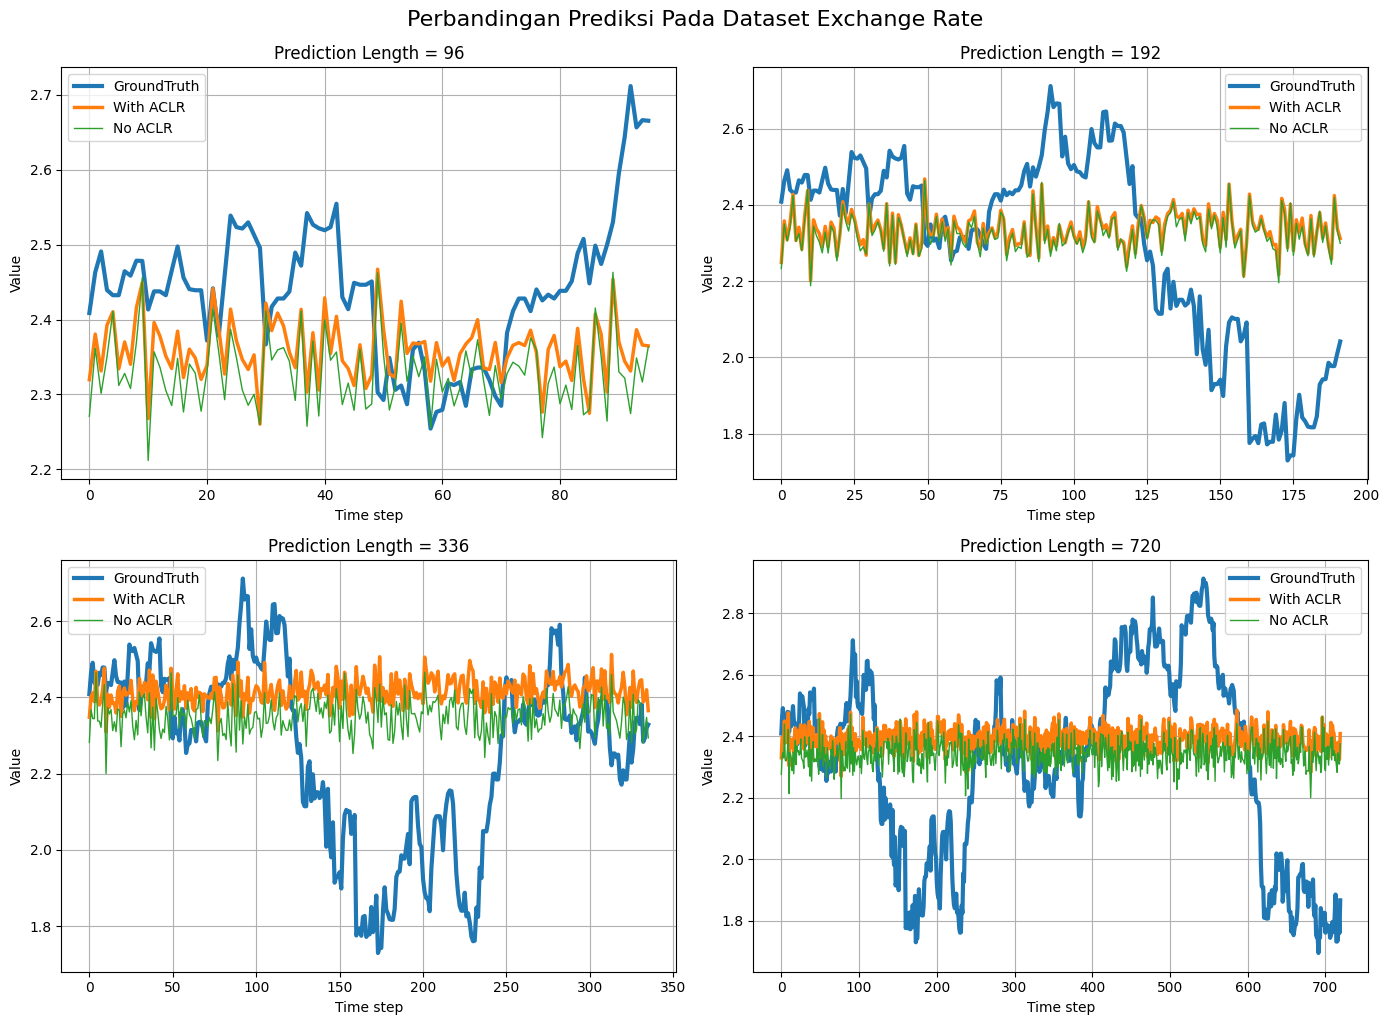

In [9]:

# List semua data prediksi dan ground truth sesuai pred_len
pred_lens = [96, 192, 336, 720]
gt_list = [gt_ex96, gt_ex192, gt_ex336, gt_ex720]
pred_list = [pred_ex96, pred_ex192, pred_ex336, pred_ex720]
pred_aclr_list = [pred_ex_aclr96, pred_ex_aclr192, pred_ex_aclr336, pred_ex_aclr720]

# Pilih indeks sampel yang ingin divisualisasikan
i = 74
# i = random.randrange(1, 700)
# i = 59
print(i)

# Buat figure dan axis 2x2
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

# Loop visualisasi untuk tiap prediction length
for idx, step in enumerate(pred_lens):
    gt = gt_list[idx]
    pred = pred_list[idx]
    pred_aclr = pred_aclr_list[idx]

    true = gt[i, :, -1]
    predict = pred[i, :, -1]
    predict_aclr = pred_aclr[i, :, -1]

    ax = axs[idx]
    ax.set_title(f'Prediction Length = {step}')
    ax.plot(true, label='GroundTruth', linewidth=3)
    ax.plot(predict_aclr, label='With ACLR', linewidth=2.5)
    ax.plot(predict, label='No ACLR', linewidth=1)
    ax.set_xlabel('Time step')
    ax.set_ylabel('Value')
    ax.grid(True)
    ax.legend()

# Rapikan layout
plt.tight_layout()
plt.suptitle('Perbandingan Prediksi Pada Dataset Exchange Rate', fontsize=16, y=1.02)
plt.show()


In [10]:
gt_et96 = np.load(r'results\ETTm2_96_96_iTransformer_custom_M_ft96_sl48_ll96_pl128_dm8_nh2_el1_dl128_df1_fctimeF_ebTrue_dtExp_projection_0\true.npy')
pred_et96 = np.load(r'results\ETTm2_96_96_iTransformer_custom_M_ft96_sl48_ll96_pl128_dm8_nh2_el1_dl128_df1_fctimeF_ebTrue_dtExp_projection_0\pred.npy')
pred_et_aclr96 = np.load(r'results\ETTm2_ACLR_96_96_iTransformer_custom_M_ft96_sl48_ll96_pl128_dm8_nh2_el1_dl128_df1_fctimeF_ebTrue_dtExp_projection_0\pred.npy')
gt_et192 = np.load(r'results\ETTm2_96_192_iTransformer_custom_M_ft96_sl48_ll192_pl128_dm8_nh2_el1_dl128_df1_fctimeF_ebTrue_dtExp_projection_0\true.npy')
pred_et192 = np.load(r'results\ETTm2_96_192_iTransformer_custom_M_ft96_sl48_ll192_pl128_dm8_nh2_el1_dl128_df1_fctimeF_ebTrue_dtExp_projection_0\pred.npy')
pred_et_aclr192 = np.load(r'results\ETTm2_ACLR_96_192_iTransformer_custom_M_ft96_sl48_ll192_pl128_dm8_nh2_el1_dl128_df1_fctimeF_ebTrue_dtExp_projection_0\pred.npy')
gt_et336 = np.load(r'results\ETTm2_96_336_iTransformer_custom_M_ft96_sl48_ll336_pl128_dm8_nh2_el1_dl128_df1_fctimeF_ebTrue_dtExp_projection_0\true.npy')
pred_et336 = np.load(r'results\ETTm2_96_336_iTransformer_custom_M_ft96_sl48_ll336_pl128_dm8_nh2_el1_dl128_df1_fctimeF_ebTrue_dtExp_projection_0\pred.npy')
pred_et_aclr336 = np.load(r'results\ETTm2_ACLR_96_336_iTransformer_custom_M_ft96_sl48_ll336_pl128_dm8_nh2_el1_dl128_df1_fctimeF_ebTrue_dtExp_projection_0\pred.npy')
gt_et720 = np.load(r'results\ETTm2_96_720_iTransformer_custom_M_ft96_sl48_ll720_pl128_dm8_nh2_el1_dl128_df1_fctimeF_ebTrue_dtExp_projection_0\true.npy')
pred_et720 = np.load(r'results\ETTm2_96_720_iTransformer_custom_M_ft96_sl48_ll720_pl128_dm8_nh2_el1_dl128_df1_fctimeF_ebTrue_dtExp_projection_0\pred.npy')
pred_et_aclr720 = np.load(r'results\ETTm2_ACLR_96_720_iTransformer_custom_M_ft96_sl48_ll720_pl128_dm8_nh2_el1_dl128_df1_fctimeF_ebTrue_dtExp_projection_0\pred.npy')

In [11]:
print(gt_et96.shape)
print(gt_et192.shape)
print(gt_et336.shape)
print(gt_et720.shape)

(13841, 96, 7)
(13745, 192, 7)
(13601, 336, 7)
(13217, 720, 7)


12488


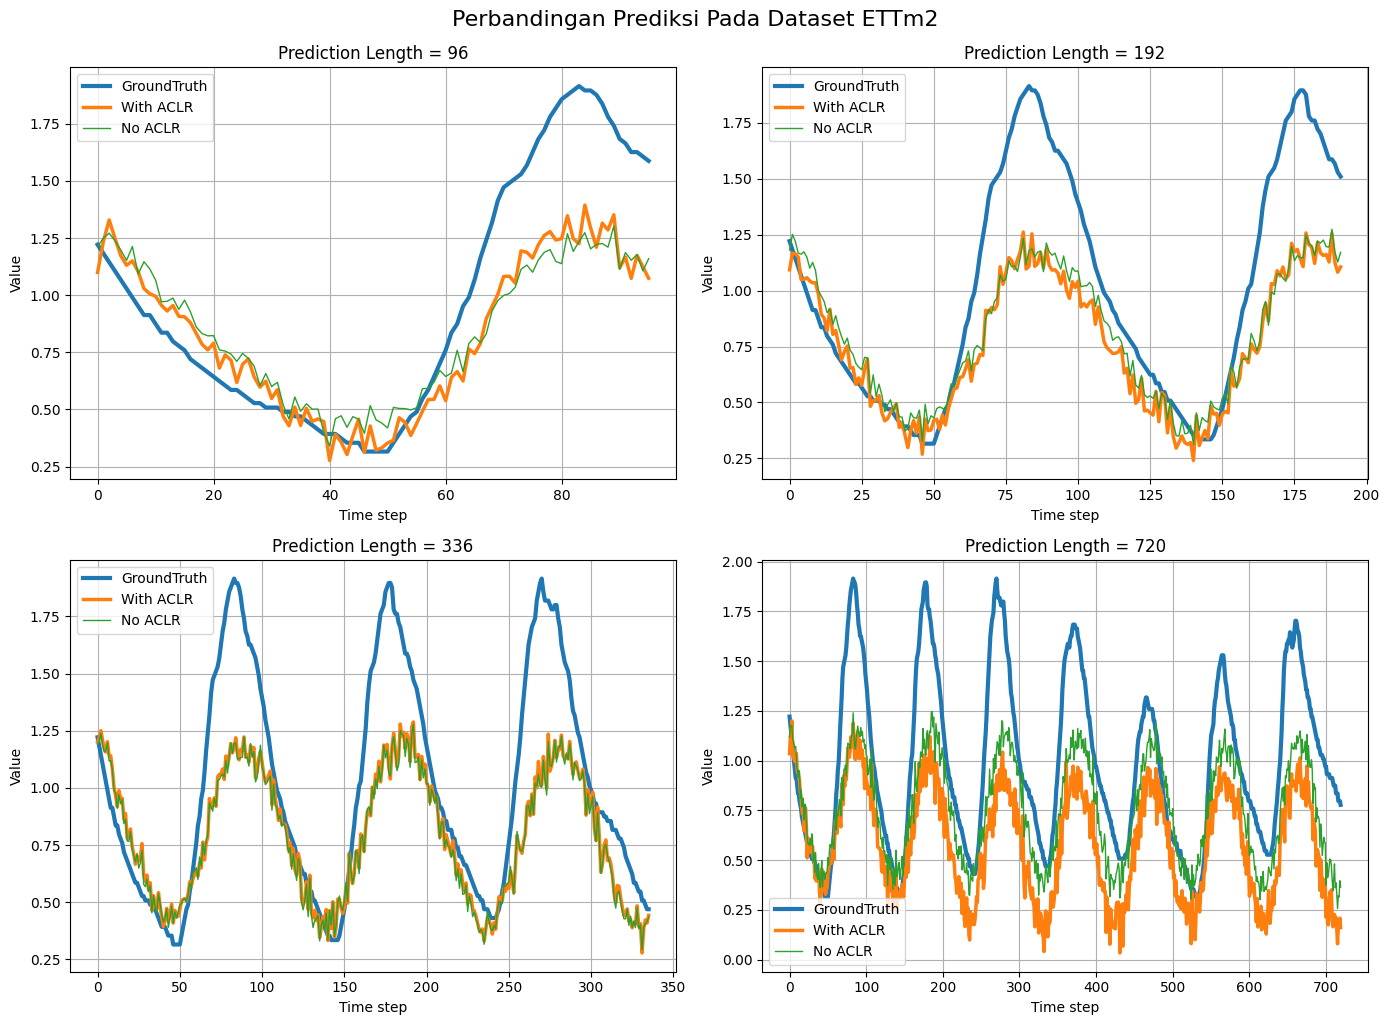

In [12]:

# List semua data prediksi dan ground truth sesuai pred_len
pred_lens = [96, 192, 336, 720]
gt_list = [gt_et96, gt_et192, gt_et336, gt_et720]
pred_list = [pred_et96, pred_et192, pred_et336, pred_et720]
pred_aclr_list = [pred_et_aclr96, pred_et_aclr192, pred_et_aclr336, pred_et_aclr720]

# Pilih indeks sampel yang ingin divisualisasikan

# i = random.randrange(1, 13000)
# i = 9415
# i = 667
# i - 4976
i = 12488
print(i)

# Buat figure dan axis 2x2
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

# Loop visualisasi untuk tiap prediction length
for idx, step in enumerate(pred_lens):
    gt = gt_list[idx]
    pred = pred_list[idx]
    pred_aclr = pred_aclr_list[idx]

    true = gt[i, :, -1]
    predict = pred[i, :, -1]
    predict_aclr = pred_aclr[i, :, -1]

    ax = axs[idx]
    ax.set_title(f'Prediction Length = {step}')
    ax.plot(true, label='GroundTruth', linewidth=3)
    ax.plot(predict_aclr, label='With ACLR', linewidth=2.5)
    ax.plot(predict, label='No ACLR', linewidth=1)
    ax.set_xlabel('Time step')
    ax.set_ylabel('Value')
    ax.grid(True)
    ax.legend()

# Rapikan layout
plt.tight_layout()
plt.suptitle('Perbandingan Prediksi Pada Dataset ETTm2', fontsize=16, y=1.02)
plt.show()


C:\Users\NCC Laboratory\AppData\Local\Temp\ipykernel_32340\755075774.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


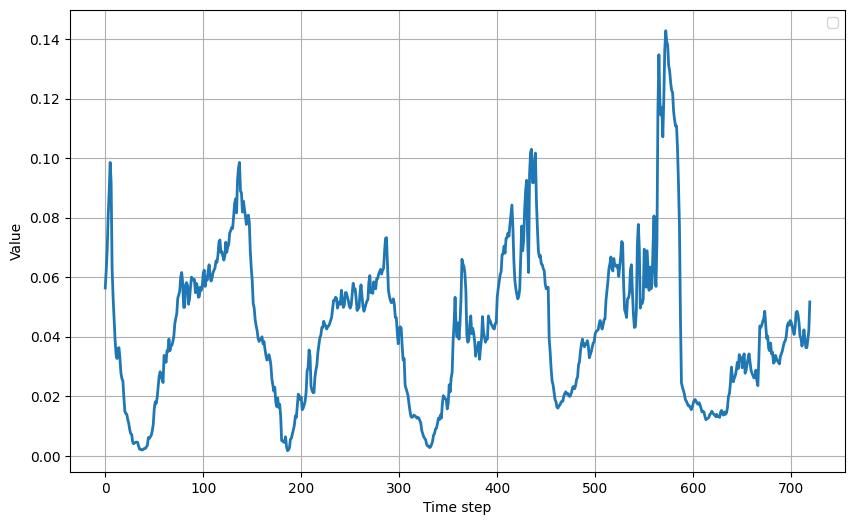

In [16]:
# Plot the ground truth data for gt720
plt.figure(figsize=(10, 6))
plt.plot(gt720[74, :, -1], linewidth=2)
# plt.title('Ground Truth for Prediction Length = 720')
plt.xlabel('Time step')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

C:\Users\NCC Laboratory\AppData\Local\Temp\ipykernel_32340\394713128.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


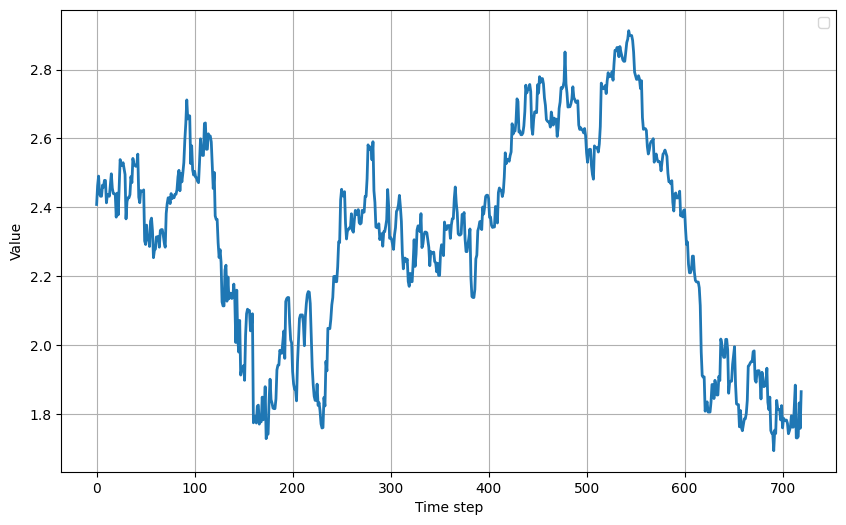

In [17]:
# Plot the ground truth data for gt720
plt.figure(figsize=(10, 6))
plt.plot(gt_ex720[74, :, -1], linewidth=2)
# plt.title('Ground Truth for Prediction Length = 720')
plt.xlabel('Time step')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

C:\Users\NCC Laboratory\AppData\Local\Temp\ipykernel_32340\3130609089.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


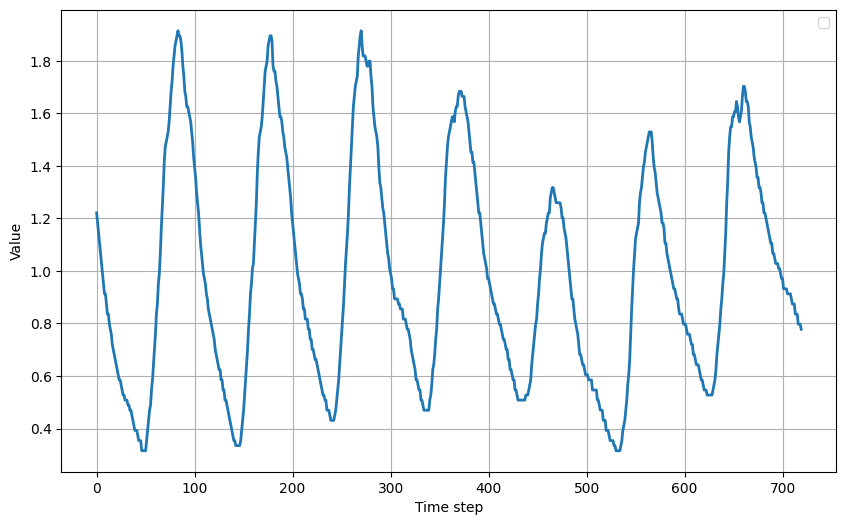

In [18]:
# Plot the ground truth data for gt720
plt.figure(figsize=(10, 6))
plt.plot(gt_et720[12488, :, -1], linewidth=2)
# plt.title('Ground Truth for Prediction Length = 720')
plt.xlabel('Time step')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset into a DataFrame
df_weather = pd.read_csv('dataset/weather/weather.csv')

# Extract the most right column and visualize rows from 12488 to 12488 + 720
column_name = df_weather.columns[-1]
data_to_plot = df_weather.iloc[42231:42231+720, 21]
a

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data_to_plot, linewidth=2)
plt.xlabel('Row Index')
plt.ylabel(column_name)
plt.grid(True)
plt.show()

NameError: name 'a' is not defined

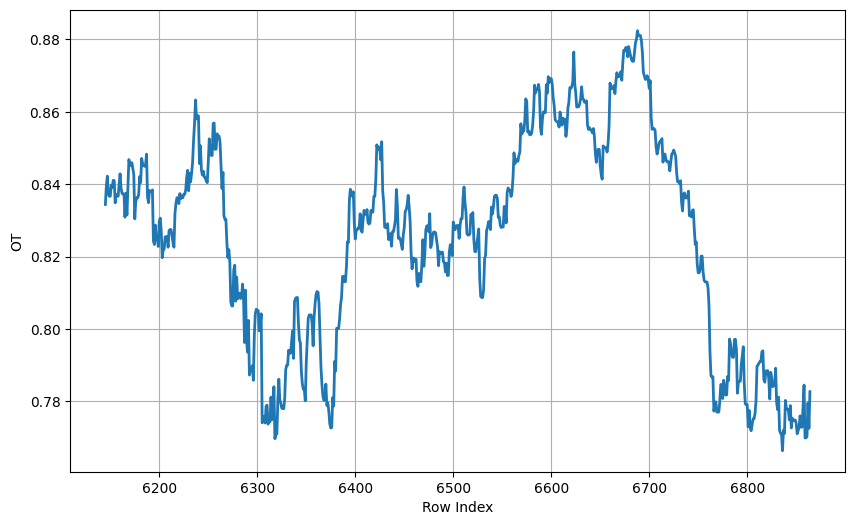

In [13]:
df_exch = pd.read_csv('dataset/exchange_rate/exchange_rate.csv')

# Extract the most right column and visualize rows from 12488 to 12488 + 720
column_name = df_exch.columns[-1]
data_to_plot = df_exch.iloc[6145:6145+720, 8]


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data_to_plot, linewidth=2)
plt.xlabel('Row Index')
plt.ylabel(column_name)
plt.grid(True)
plt.show()

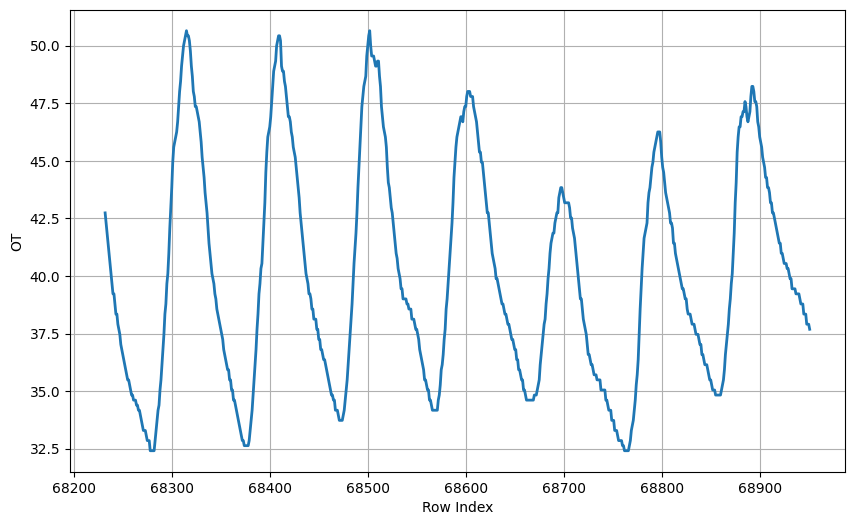

In [17]:
df_ett = pd.read_csv('dataset/ETT-small/ETTm2.csv')

# Extract the most right column and visualize rows from 12488 to 12488 + 720
column_name = df_ett.columns[-1]
data_to_plot = df_ett.iloc[68232:68232+720, 7]


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data_to_plot, linewidth=2)
plt.xlabel('Row Index')
plt.ylabel(column_name)
plt.grid(True)
plt.show()